READING DATA PARAMETERS

doesn't work there - use script jd.py in spyder 4.0

TRAILED SPECTRA

0     0.065912
1     0.101165
2     0.206922
3     0.242174
4     0.347932
5     0.383081
6     0.395294
7     0.500949
8     0.536201
9     0.642267
10    0.677519
11    0.783276
12    0.818632
13    0.924800
14    0.960052
Name: hjd, dtype: float64


/tmp/ipykernel_443498/3641212476.py:86: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


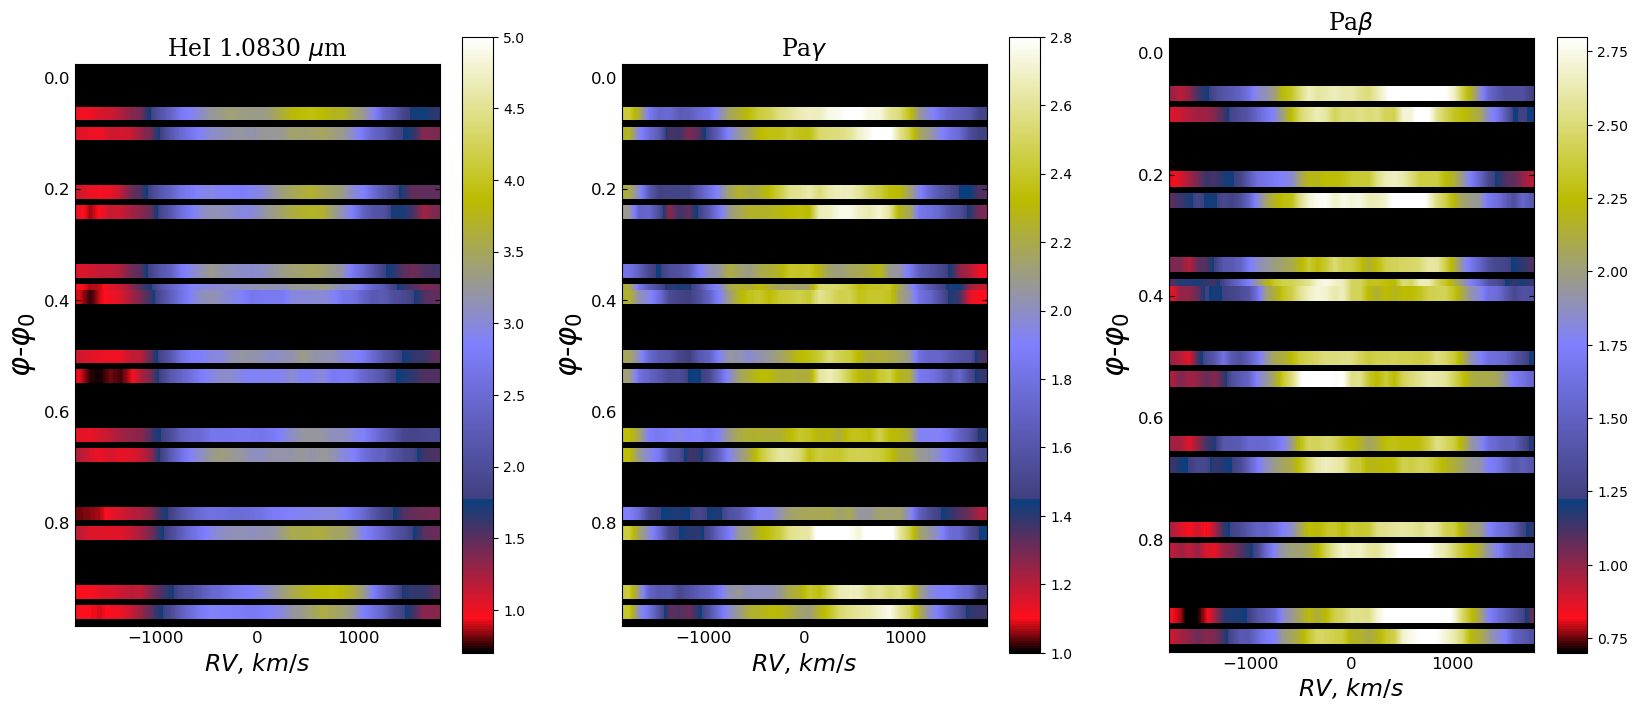

In [77]:
import numpy as np
import os 
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import pandas as pd
from scipy.optimize import minimize
os.chdir(r'/home/parallels/V455_And/gemini_data/2005_09_01/J-grism-obj/normalized')
data = pd.read_table('list_pars_trailed', comment='#')
hjds = data['hjd']
rv_corr = data['rv_corr']
period = 0.05630921 #days

bjds = data['bjd']
hjd0 = 2451812.67765 #Araujo-Betancour
expos = 120/24/60/60/period
phases = (hjds - hjd0)/period - (hjds - hjd0)//period #- np.floor((bjds - bjds[0])/period)
NormSpec=pd.read_table('obj_trailedspec', header=None)

specs=[]

print(phases)
corrs=np.zeros(len(NormSpec))
for i in range(0, len(NormSpec)):
    specs.append(np.loadtxt(NormSpec[0][i]))
    
for j in range(0, len(specs)):
    specs[j][:,0] = specs[j][:,0] * (rv_corr[j]/(3e5) + 1)
    
def load_specs(lam0, wing):
    xx=[]
    yy=[]
    for k in range(len(NormSpec)):
        xx1=[]
        yy1=[]
        xlim1=lam0-(wing/3e5)*lam0; xlim2=lam0+(wing/3e5)*lam0
        for i in range(0, len(specs[k][:,0])):
            if((specs[k][i,0]>=xlim1) & (specs[k][i,0]<=xlim2)):
                xx1.append(specs[k][i,0])
                yy1.append(specs[k][i,1]) #-1 есть вычитание подложки из нормированных спектров
        #yyf = ss.savgol_filter(yy1, 5, 2)
        xx.append(xx1)
        yy.append(yy1)
    return xx, yy
        
def get_image(l1, l2, phases, expos, xx, yy, bkg):
    pp =  np.linspace(-expos, phases[len(phases)-1]+expos,1000)
    vv = np.linspace(l1, l2, 1000)
    xxm, yym = np.meshgrid(vv, pp)
    zz0=np.zeros((len(pp),len(vv)))
    for i in range(0,len(pp)):
        filled = False
        for p in range(0, len(phases)):
            if (phases[p]<=(pp[i]+expos/2)) & (phases[p]>(pp[i]-expos/2)):
                for k in range(0, len(vv)):
                    zz0[i,k]=np.abs(np.interp(vv[k], xx[p], yy[p]))
                filled = True
        if filled==False:
            for k in range(0, len(vv)):
                    zz0[i,k]=bkg
    return zz0, vv, pp


lam0=10830 #HeI
lam1=10938 #Pa-gam
lam2=12818 #Pa-beta
wing0=1800# wing in km/s
wing1=1800 
wing2=1800

xx0, yy0 = load_specs(lam0, wing0)
zz0, vv0, pp0 = get_image(lam0-(wing0/3e5)*lam0, lam0+(wing0/3e5)*lam0, phases, expos, xx0, yy0, 0) 
xx1, yy1 = load_specs(lam1, wing1)
zz1, vv1, pp1 = get_image(lam1-(wing1/3e5)*lam1, lam1+(wing1/3e5)*lam1, phases, expos, xx1, yy1, 0)
xx2, yy2 = load_specs(lam2, wing2)
zz2, vv2, pp2 = get_image(lam2-(wing2/3e5)*lam2, lam2+(wing2/3e5)*lam2, phases, expos, xx2, yy2, 0)  

csfont = {'fontname':'Serif'}

plt.figure(figsize=(20,8))
plt.title('V455 And, J-grism')
plt.subplots_adjust(hspace=0.3)

plt.subplot(131)
plt.imshow(zz0, interpolation="nearest", cmap=plt.get_cmap("gist_stern"), extent=[((vv0[0]-lam0)/lam0)*3e5,((vv0[len(vv0)-1]-lam0)/lam0)*3e5,pp0[-1],pp0[0]], aspect=5500)
plt.tick_params(axis="both", direction="in", right='on', top='on', labelsize=12)
plt.xlabel("$RV$, $km/s$", **csfont, size=17)
plt.ylabel("$\\varphi$-$\\varphi_0$", **csfont, size=22)
plt.title('HeI 1.0830 $\\mu$m', **csfont, size=17)
plt.clim(0.7,5)
plt.colorbar()

plt.subplot(132)
plt.imshow(zz1, interpolation="nearest", cmap=plt.get_cmap("gist_stern"), extent=[((vv1[0]-lam1)/lam1)*3e5,((vv1[len(vv1)-1]-lam1)/lam1)*3e5,pp1[-1],pp1[0]], aspect=5500)
plt.tick_params(axis="both", direction="in", right='on', top='on', labelsize=12)
plt.xlabel("$RV$, $km/s$", **csfont, size=17)
plt.ylabel("$\\varphi$-$\\varphi_0$", **csfont, size=22)
plt.title('Pa$\gamma$', **csfont, size=17)
plt.clim(1,2.8)
plt.colorbar()

plt.subplot(133)
plt.imshow(zz2, interpolation="nearest", cmap=plt.get_cmap("gist_stern"), extent=[((vv2[0]-lam2)/lam2)*3e5,((vv2[len(vv2)-1]-lam2)/lam2)*3e5,pp2[-1],pp2[0]], aspect=6000)
plt.xlabel("$RV$, $km/s$", **csfont, size=17)
plt.ylabel("$\\varphi$-$\\varphi_0$", **csfont, size=22)
plt.title("Pa$\\beta$", **csfont, size=17)
plt.colorbar()
plt.clim(0.7,2.8)
plt.tick_params(axis="both", direction="in", right='on', top='on', labelsize=12)
plt.show()
#plt.savefig('Dyn.png')

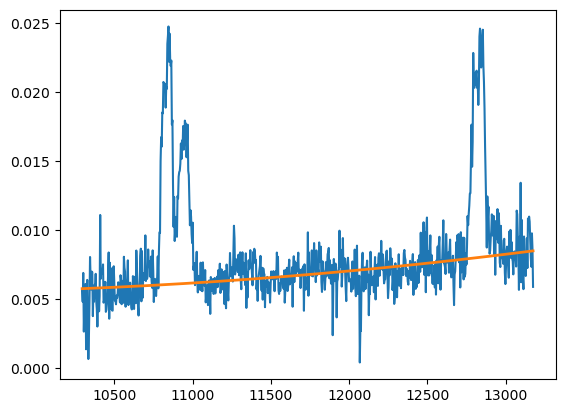

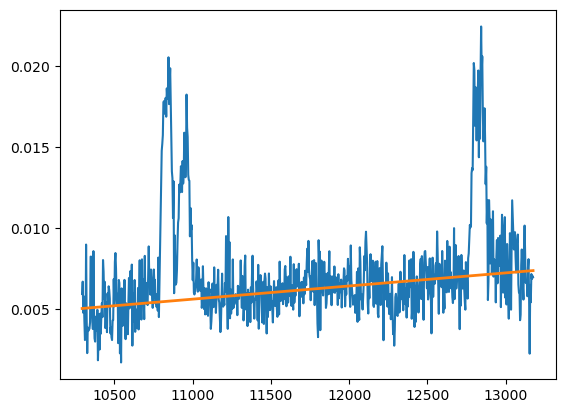

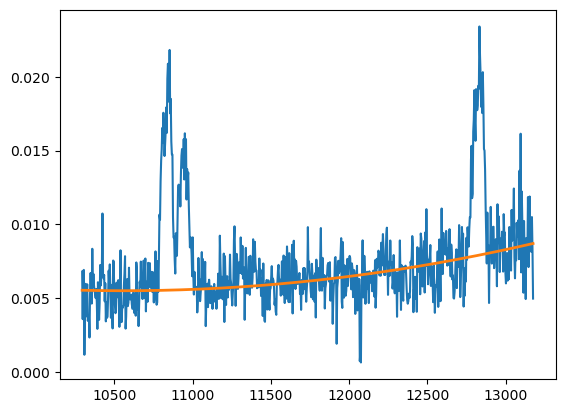

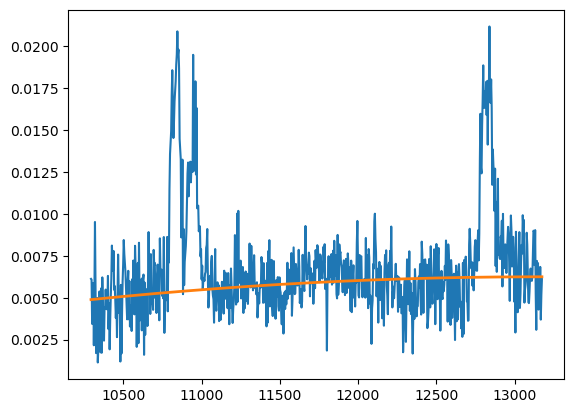

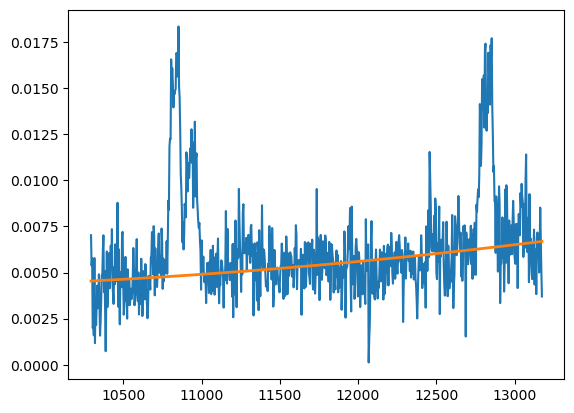

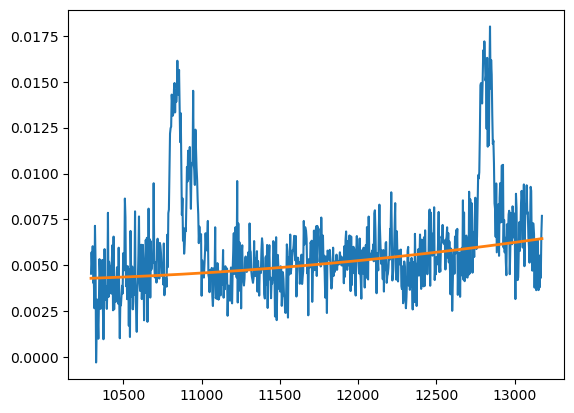

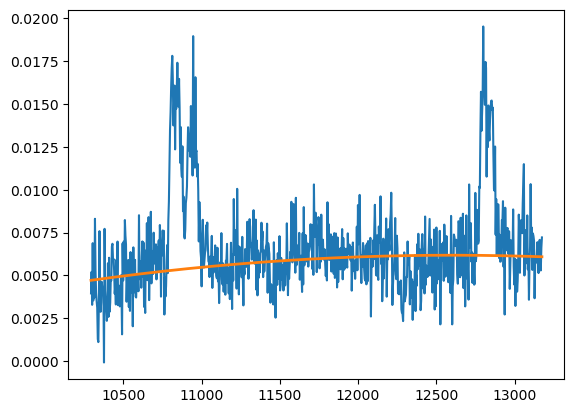

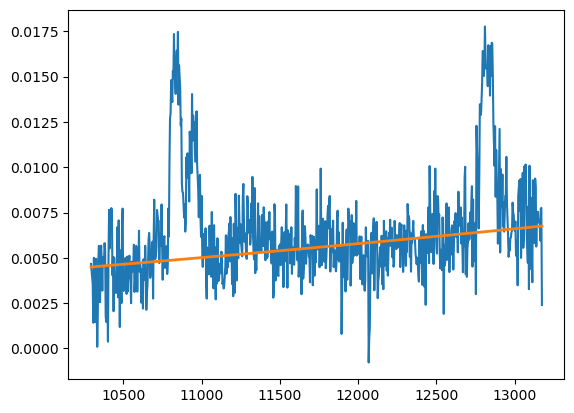

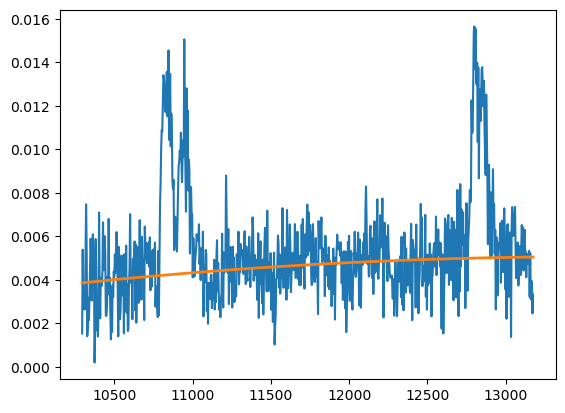

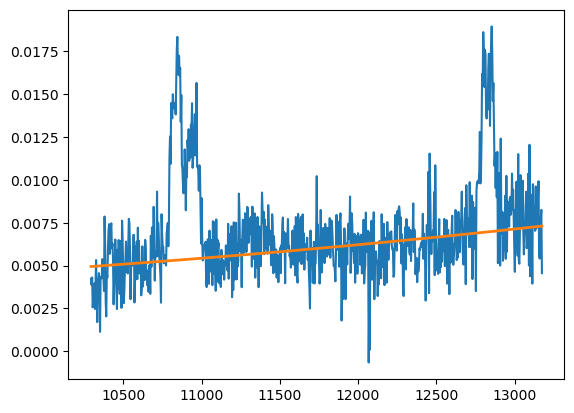

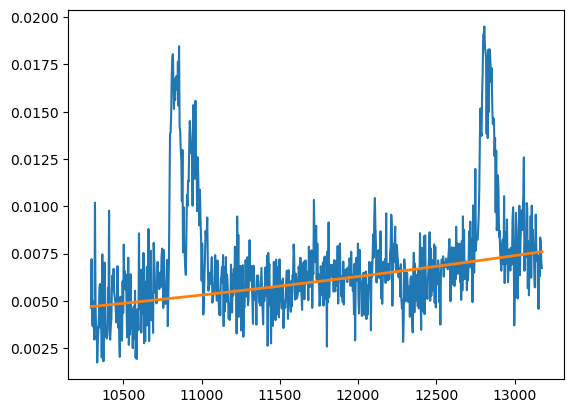

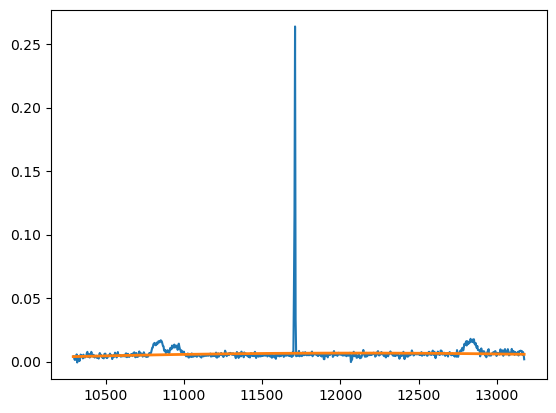

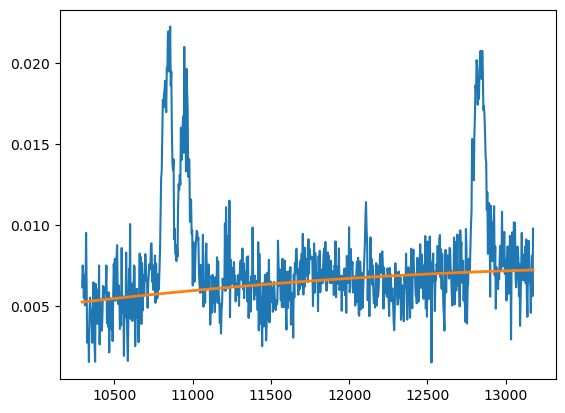

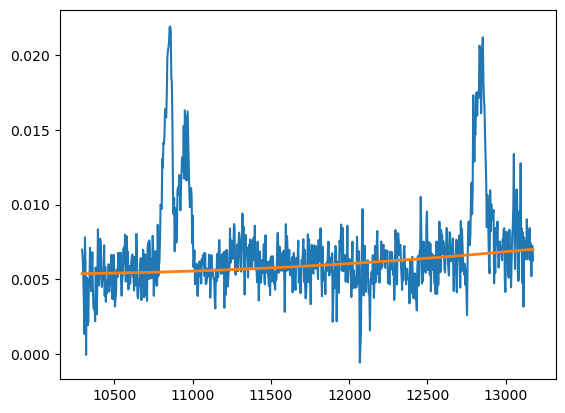

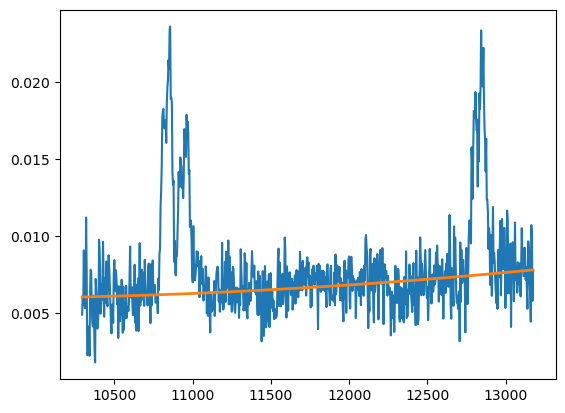

In [60]:
import pandas as pd

os.chdir(r'/home/parallels/V455_And/gemini_data/2005_09_01/J-grism-obj/normalized')

NormSpec=pd.read_table('obj_norm_txt', header=None)

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def cut(spec):
    wv, fx = [], []
    for i in range(len(spec[:,0])):
        if spec[:,0][i] < 10750:
            wv.append(spec[:,0][i])
            fx.append(spec[:,1][i])
        elif spec[:,0][i] > 11100 and spec[:,0][i] < 12700:
            wv.append(spec[:,0][i])
            fx.append(spec[:,1][i])
        elif spec[:,0][i] > 12920:
            wv.append(spec[:,0][i])
            fx.append(spec[:,1][i])
    wv = np.array(wv)
    fx = np.array(fx)
    return wv, fx


for s in range(len(NormSpec)):
    spec = np.loadtxt(NormSpec[0][s], skiprows=178, max_rows=800)
    plt.figure()
    plt.plot(spec[:,0], spec[:,1])
    wv, fx = cut(spec)
    z = np.polyfit(wv, fx, 2)
    p = np.poly1d(z)
    plt.plot(spec[:,0], p(spec[:,0]), linewidth=2)
    ar=np.array((spec[:,0], smooth(spec[:,1]/p(spec[:,0]), 4)))
    ar=ar.transpose()
    np.savetxt(NormSpec[0][s][:18] + 'n.txt', ar)





CROSS-CORRELATION for K1-velocity estimation

In [ ]:
import scipy.signal as ss
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import pandas as pd

os.chdir(r'/home/parallels/V455_And/gemini_data/2005_09_01/J-grism-obj/normalized')

data = pd.read_table('list_pars', comment='#')
rv_corr = data['rv_corr']

def cut(spec):
    wv, fx = [], []
    for i in range(len(spec[:,0])):
        if spec[:,0][i] > 10500 and spec[:,0][i] < 11600: #11100
            wv.append(spec[:,0][i])
            fx.append(spec[:,1][i])
        elif spec[:,0][i] > 11800 and spec[:,0][i] < 13000:
            wv.append(spec[:,0][i])
            fx.append(spec[:,1][i])
    wv = np.array(wv)
    fx = np.array(fx)
    return wv, fx

specs=[]

NormSpec=pd.read_table('obj_norm_cross', header=None)



for i in range(0, len(NormSpec)):
    #sp = np.loadtxt(NormSpec[0][i])
    #wv, fx = cut(sp)
    #plt.figure()
    #plt.plot(wv, fx)
    #ar=np.array((wv, fx))
    #ar=ar.transpose()
    #specs.append(ar)
    specs.append(np.loadtxt(NormSpec[0][i]))
    
for j in range(0, len(specs)):
    specs[j][:,0] = specs[j][:,0] * (rv_corr[j]/(3e5) + 1)    



#кросс-корреляционная функцию
def cc(F,T,vr):
    Fsum = 0
    Tsum = 0
    Summ = 0
    Fem = np.mean(F[:,1])
    Tem = np.mean(T[:,1])
    Tdel = np.zeros(len(T[:,0]))
    Tpol = np.zeros(len(T[:,1]))
    for i in range(0, len(T[:,0])):
        Tdel[i] = (T[:,0][i])*(1 + vr/3e5) #получаем смещённые длины волн шаблонного спектра
    for j in range(0, len(F[:,0])):  
        Tpol[j] = np.interp(F[:,0][j], Tdel, T[:,1]) #интерполяция смещённого шаблонного спектра на длинах волн спектра F
        Summ = Summ + (F[:,1][j] - Fem)*(Tpol[j] - Tem)
        Fsum = Fsum + (F[:,1][j] - Fem)**2
        Tsum = Tsum + (Tpol[j] - Tem)**2
    cc = Summ/(np.sqrt(Fsum*Tsum))
    return cc

def shift(S, vr):
    ds = [[],[]]
    for i in range(0, len(S[:,0])):
        ds[0].append((S[:,0][i])*(1 + vr/3e5)) #перезаписываем длины волн в тот же массив
        ds[1].append(S[:,1][i])
    return ds

def flux_interpolate(F, T):
    Tlux = np.zeros(len(F[:,0]))
    for i in range(0, len(F[:,0])):
        Tlux[i] = np.interp(T[:,0][i], F[:,0], F[:,1])
    return Tlux

#addtional funcs
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def quad(x, a, b, c):
    return a*x**2.0 + b*x + c

#1 iteration
MVr = []
mean = []
shifted_spectras = []
shifted_spectras.append(specs[0])
for m in range(1, len(NormSpec)):
    vr = np.linspace(-600,600,1000)
    CC = np.zeros(len(vr))
    for i in range(len(vr)):
        CC[i] = cc(specs[m],specs[0],vr[i])
    
    #popt_parab, pcov_parab = curve_fit(quad, vr, CC)
    #A, B, C = popt_parab[0], popt_parab[1], popt_parab[2] -
    #CC_fit = quad(vr, A, B, C)
    
    Maxcc = max(CC)
    
    for i in range(len(CC)):
        if Maxcc == CC[i]:
            Maxvr = vr[i]
    print(Maxcc, Maxvr)
    MVr.append(Maxvr)
    plt.figure()
    plt.plot(vr, CC, label='1 iteration')
    #plt.plot(vr, CC_fit, '--m', label='quadfit')
    plt.legend()
    
    DS = shift(specs[m], Maxvr)
    A = DS[:][0]
    Flux = DS[:][1]
    arr = np.array((A, Flux))
    arr = arr.transpose()
    shifted_spectras.append(arr)
    
    #interpolate on lambdas of first spectra (which is a template on 1 iteration)
    Tlux = flux_interpolate(arr, specs[0])
    
    ar = np.array((specs[0][:,0], Tlux))
    ar = ar.transpose()
    mean.append(ar)

MVr=np.array(MVr)
plt.figure()
plt.plot(MVr, '.r')
plt.show()

#np.savetxt('Vr_curve', MVr)


tempspec=np.mean(mean, axis=0)
plt.figure()
plt.plot(tempspec[:,0], tempspec[:,1], '.k', label='tempspec')
plt.plot(tempspec[:,0], smooth(tempspec[:,1], 3), '-r', label='smooth') 
plt.legend()

# if important you may use smoothing of spectrum
#t=np.array((tempspec[:,0], smooth(tempspec[:,1], 3)))
t=np.array((tempspec[:,0], tempspec[:,1]))

t=t.transpose()

print('\n second iteration \n')
#2 iteration
MVr = []
for m in range(len(NormSpec)):
    vr = np.linspace(-600,600,1000)
    CC = np.zeros(len(vr))
    for i in range(len(vr)):
        CC[i] = cc(shifted_spectras[m],t,vr[i])
    
    #popt_parab, pcov_parab = curve_fit(quad, vr, CC)
    #A, B, C = popt_parab[0], popt_parab[1], popt_parab[2]
    #CC_fit = quad(vr, A, B, C)
    
    Maxcc = max(CC)
    
    
    
    for i in range(len(CC)):
        if Maxcc == CC[i]:
            Maxvr = vr[i]
    print(Maxcc, Maxvr)
    MVr.append(Maxvr)
    plt.figure()
    plt.plot(vr, CC, label='2 iteration')
    #plt.plot(vr, CC_fit, '--m', label='quadfit')
    plt.legend()





#dates=pd.read_table('phases', header=None)
#phases=np.array(dates[1])
#thresh=170
MVr=np.array(MVr)
plt.figure()
#phases=phases[MVr<thresh]
#MVr=MVr[MVr<thresh]
plt.plot(MVr, '.r')
plt.show()

#np.savetxt('Vr_curve', MVr)



RVC AND K-1 DETERMINATION

16.28013188942076 52.622167585739334 0.40735137570315777

errors
 5.2796301873124625 17.190150818576864 0.22270331123333076


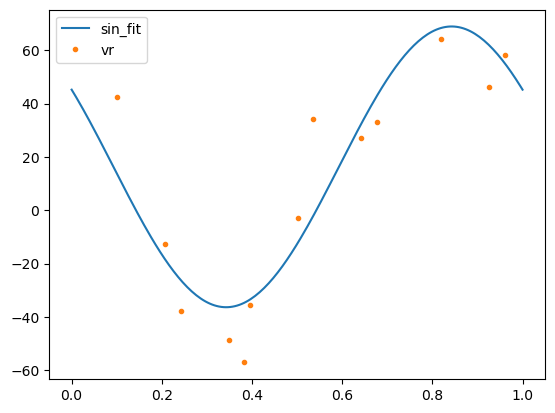

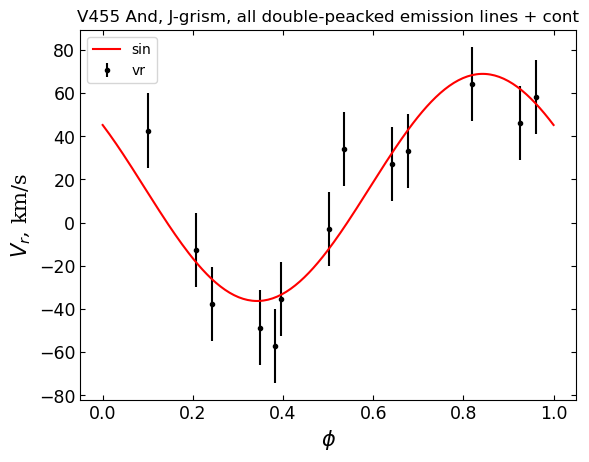

In [102]:
import os
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.optimize import minimize

os.chdir(r'/home/parallels/V455_And/gemini_data/2005_09_01/J-grism-obj/normalized')

data=pd.read_table('phases.dat', header=None)
phases=data[1]
vr = np.loadtxt('Vr_curve')
#vr_err = np.loadtxt('vr_stds')
def sin(v_gamma, k, phase_0, phase):
    return v_gamma + k*np.sin(np.pi*2*(phase + phase_0))

def chi2(pars):
    s = 0
    for i in range(len(phases)):
        s = s + ((vr[i] - sin(pars[0], pars[1], pars[2], phases[i])))**2
    return s

pars = [0, 60, phases[0]]
res = minimize(chi2, pars, method='Nelder-Mead')
print(res.x[0], res.x[1], res.x[2])
phases1 = np.linspace(0, 1, 200)
fit_curve = sin(res.x[0], res.x[1], res.x[2], phases1)
plt.figure()
plt.plot(phases1, fit_curve, '-', label='sin_fit')
plt.plot(phases, vr, '.', label='vr')
plt.legend()

fit_curve_obs = sin(res.x[0], res.x[1], res.x[2], phases)
s = 0
for i in range(0, len(vr)):
    s = s + ((vr[i] - fit_curve_obs[i]))**2
sig = np.sqrt(s/(len(vr)-3))

v_gamma = []
k = []
phase_0 = []
vr = np.zeros(len(vr))# массив для фиктивных кривых луч. скоростей
#метод Монте-Карло для поиска ошибок (настоящие мужики)    
for i in range(0, 999):
    vr = np.random.normal(fit_curve_obs, sig) 
    res = minimize(chi2, pars, method='Nelder-Mead')
    v_gamma.append(res.x[0])
    k.append(res.x[1])
    phase_0.append(res.x[2])

sig_v_gamma = np.std(v_gamma)
sig_k = np.std(k)
sig_phase_0 = np.std(phase_0)

k_err=np.zeros(len(vr))
for i in range(len(vr)):
    k_err[i]=sig_k
    
print('\nerrors\n', sig_v_gamma, sig_k, sig_phase_0)

vr = np.loadtxt('Vr_curve')
csfont={'fontname':'Serif'}
plt.figure()
plt.title('V455 And, J-grism, all double-peacked emission lines + cont')
plt.ylabel('$V_{r}$, km/s', **csfont, size=15)
plt.xlabel('$\\phi$', **csfont, size=15)
plt.tick_params(axis="both", direction="in", right='on', top='on', labelsize=12.5)
plt.errorbar(phases, vr, yerr=k_err, fmt='k.', label='vr')
plt.plot(phases1, fit_curve, 'r-', label='sin')
plt.legend()

TOMOGRAPHY (dopp_beauty code)

2
[0. 0. 0. ... 0. 0. 0.]


/tmp/ipykernel_4005/2998954375.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('hot_r')


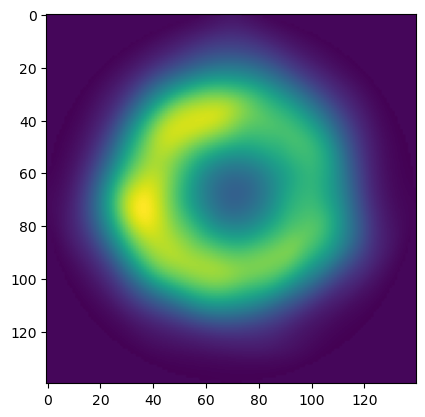

start R =  32.7891704035831


155.97031523790025 15.704309846712981 28.983176125781075 67.93633953583473 67.53137867825444


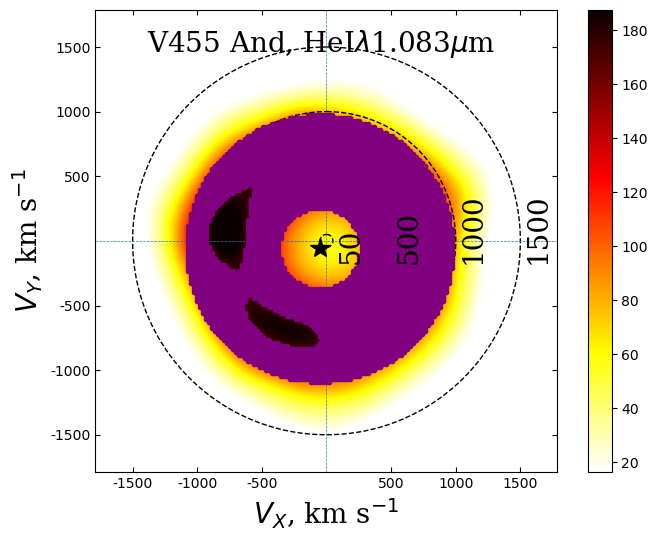

veloc =  74.67714650706688


In [13]:
import sys
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
import pylab as pyl
from scipy.optimize import minimize

csfont = {'fontname':'Serif', 'fontsize':'20'}
os.chdir(r'/home/parallels/doptomog-2.0')
###############################################################################
source = "v455heI_ir" # The source;
projection = 0     # 0 --- standard projection; 1 --- inside-out projection;
fluxmod = 0          # 0 --- standard mode; 1 --- flux-modulated mode;
model_overlap=0      # 0 --- no model; 1 --- overlap doppmap by the model;
polar_grid = 0
caster_grid = 1
#title = 'V455 And, H$_{\\delta}$'
title = 'V455 And, HeI$\\lambda$1.083$\\mu$m'
#cmap = matplotlib.cm.get_cmap('gist_stern_r')
cmap = matplotlib.cm.get_cmap('hot_r')
vels0 = np.array([500, 1000, 1500])
trim_intes = 1
imax = 0.95; imin=0.1
###############################################################################

path = 'sources/' + source + '/out/doptomog/'
if fluxmod == 0 and projection == 0:
    path = path + 'doptomog.0.out'
    print(2)
elif fluxmod == 0 and  projection == 1:
    path = path + 'doptomog.1.out'
    print(1)
elif fluxmod == 1 and projection == 0:
    path = path + 'fluxmodmap/' + 'fluxmodmap.0.out'
elif fluxmod == 1 and projection == 1:
    path = path + 'fluxmodmap/' + 'fluxmodmap.1.out'
else:
    sys.exit('Error in input parameters')

def loaddata(file):
    f = open(file)
    ##########################################################################
    parts = f.readline().split()
    vmax=float(parts[0]); vf=float(parts[1]); nps=int(parts[2]); proj=int(parts[3])  
    ##########################################################################
    parts = f.readline().split()
    lll=float(parts[0]); nvm=int(parts[1]); npm=int(parts[2]); nvp=int(parts[3])  
    ##########################################################################
    parts = f.readline().split()
    vs, gam, w0 = float(parts[0]), float(parts[1]), float(parts[2])
    ##########################################################################
    f.close()
    
    f = open(file)
    lines = f.readlines()
    phases, n_end_line = readnumbers(lines, 3, npm)
    dphases, n_end_line = readnumbers(lines, n_end_line+1, npm)
    vp, n_end_line = readnumbers(lines, n_end_line+1, nvp)
    fluxes_input, n_end_line = readnumbers(lines, n_end_line+1, nvm)
    fluxes_recon, n_end_line = readnumbers(lines, n_end_line+2, nvm)
    intes, n_end_line = readnumbers(lines, n_end_line+3, nps**2)
    dopmap = np.reshape(intes, (nps,nps))
    print(intes)
    return dopmap, vmax, intes

    
def readnumbers(lines,startline, partsnum):
    res=np.zeros(partsnum)
    n_end_line = 0
    k=0
    for i in range(startline, len(lines)):
        parts = lines[i].split()
        for j in range(len(parts)):
            res[k] = float(parts[j])
            k=k+1
        if k==partsnum:
            n_end_line=i
            break
    return res, n_end_line

def circcoo(vv, vmax, nps, projection):
    alphas = np.linspace(0, 2*np.pi, 300)
    xx = 0; yy = 0
    if projection == 0:
        for i in range(len(vv)):
            xx = nps/2+(nps*vv[i]/vmax/2)*np.sin(alphas)
            yy = nps/2+(nps*vv[i]/vmax/2)*np.cos(alphas)
            plt.text(nps/2+(nps*vv[i]/vmax/2)+nps*0.01, nps/2 - nps*0.04, str(vv[i]), **csfont, rotation=90)
            plt.plot(xx, yy, '--k', linewidth=1.0)
    else:
        for i in range(len(vv)):
            xx = nps/2+(nps/2-nps*vv[i]/vmax/2)*np.sin(alphas)
            yy = nps/2+(nps/2-nps*vv[i]/vmax/2)*np.cos(alphas)
            plt.text(nps/2+(nps/2-nps*vv[i]/vmax/2)+nps*0.01, nps/2 - nps*0.04, str(vv[i]), **csfont, rotation=90)
            plt.plot(xx, yy, '--k', linewidth=1.0)
    return xx, yy

def cootrans(mas, nps, vmax, proj):
    #print(mas)
    vx = mas[:,0]
    vy = mas[:,1]
    
    vxb = []
    vyb = []
    for i in range(len(vx)):
        if np.sqrt(vx[i]**2+vy[i]**2)*1000<vmax:
            vxb.append(vx[i])
            vyb.append(vy[i])
    vx = np.array(vxb)
    vy = np.array(vyb)
    
    mod = np.sqrt(vx**2+vy**2)
    for i in range(len(mod)):
            if mod[i]*1000 > vmax:
                mod[i]=vmax
    xx = 0; yy = 0

    if proj == 0:
        xx=nps/2+nps*vx*1000/vmax/2
        yy=nps/2+nps*vy*1000/vmax/2

    if proj == 1:
        mod = (nps/2-nps*mod*1000/vmax/2)
        theta = np.arctan(vy/vx)
        for i in range(len(theta)):
            if vx[i] < 0:
                theta[i] = theta[i] + np.pi
        xx=nps/2+mod*np.cos(theta)
        yy=nps/2+mod*np.sin(theta)
    
    return np.array([xx, yy]).transpose()

def plotmodel(proj):

    path0 = 'sources/' + source + '/out/binarymodel/idl/'
    path = path0 + 'vStreamBal.out'
    data = np.loadtxt(path)
    res = cootrans(data[:,:2], nps, vmax, proj)
    vxb = res[:,0]
    vyb = res[:,1]
    
    path = path0 + 'vPrimary.out'
    data = np.loadtxt(path)
    res = cootrans(data[:,:2], nps, vmax, proj)
    vxp = res[:,0]
    vyp = res[:,1]

    path = path0 + 'vSecondary.out'
    data = np.loadtxt(path)
    res = cootrans(data[:,:2], nps, vmax, proj)
    vxs = res[:,0]
    vys = res[:,1]
  
    path = path0 + 'vCOM.out'
    data = np.loadtxt(path)
    res = cootrans(np.array([data[:2]]), nps, vmax, proj)
    vxc = res[0,0]
    vyc = res[0,1]
      
    path = path0 + 'vBinary.out'
    data = np.loadtxt(path)
    res = cootrans(data[:,:2], nps, vmax, proj)
    vxbin = res[:,0]
    vybin = res[:,1]
    
    path = 'sources/' + source + '/out/binarymodel/gnu/vStreamMag.out'
    f = open(path, 'r')
    f.readline()
    ldata = []
    ldata.append([])
    iii = 0
    while True:
        line = f.readline()
        if line == "":
            ldata = ldata[:-1]
            break
        parts = line.split()
        if len(parts) >= 3:
            ldata[iii].append([float(parts[0]), float(parts[1])])
        else:
            ldata.append([])
            iii = iii+1
            continue
    f.close()
    vxm=[]
    vym=[]
    for i in range(len(ldata)):
        res = cootrans(np.array(ldata[i]), nps, vmax, proj)
        vxm.append(res[:,0])
        vym.append(res[:,1])

    
    path = path0 + 'vStreamMagConnect.out'
    data = np.loadtxt(path)
    res = cootrans(data[:,:2], nps, vmax, proj)
    vxcon = res[:,0]
    vycon = res[:,1]
    
    nmag = int(len(vxcon)/2)
    
    plt.plot(vxb, vyb, '-r', linewidth=1)
    plt.plot(vxp, vyp, '--r', linewidth=1)
    plt.plot(vxs, vys, '-r', linewidth=1)
    plt.plot(vxc, vyc, 'xr')
    plt.plot(vxbin, vybin, '+r')
    for i in range(len(vxm)):
        print(vxm[i])
        plt.plot(vxm[i], vym[i], '--', markersize=5, color="b")
    for i in range(nmag):
        plt.plot([vxcon[i*2], vxcon[i*2+1]], [vycon[i*2], vycon[i*2+1]], '.--r', linewidth=0.5)
        
    return vxb, vyb, vxp, vyp, vxs, vys, vxc, vyc, vxbin, vybin
dopmap, vmax, intes= loaddata(path)
plt.imshow(dopmap)
plt.show()


XX = []
YY = []
In = []
# HeI
v = 60
spot = 175


# Pa-b
#v = 90
#spot = 240

# Pa-g
#v = 40
#spot = 110

for i in range(len(dopmap[0])):
    for j in range(len(dopmap[0])):
        p = dopmap[i][j]
        if (p > v) and (p < spot):
           XX.append(j)
           YY.append(i)
           In.append(dopmap[i][j])

I = []
Xal = []
Yal = []
for i in range(len(dopmap[0])):
    for j in range(len(dopmap[0])):
        p = dopmap[i][j]
        if (p > v) and (p < spot):
           Xal.append(j)
           Yal.append(i)
           I.append(dopmap[i][j])



'''
for i in range(len(dopmap[0])):
    for j in range(len(dopmap[0])):
        p = dopmap[i][j]
        
        #if (j >= 45 and j <=85 and i >=45 and i <=90):
            
        #if (j >=50 and j <= 80 and i >=30 and i <= 110):
        if (p < 3e-16) and p > 8e-17:
            I.append(dopmap[i][j])
            Xal.append(j)
            Yal.append(i)
        #elif (i >= 30 and i <=50 and j>=30 and j < 50):
            #if (p < 6e-16):
             #   I.append(dopmap[i][j])
             #   Xal.append(j)
             #   Yal.append(i)
'''
'''
XXsp = []
YYsp = []
Isp = []
for i in range(len(dopmap[0])):
    for j in range(len(dopmap[0])):
        #p = dopmap[i][j]
        #if (p > spot):
           XXsp.append(j)
           YYsp.append(i)
           Isp.append(dopmap[i][j])
'''

nps = len(dopmap[0])
vmax = vmax/1000

ticks=0
if projection == 0:
    vels = np.concatenate([-vels0, vels0])    
    ticks = nps/2+vels*nps/vmax/2
else:
    vels = np.concatenate([-vels0, np.flip(vels0)])    
    ticks1 = vels0*nps/vmax/2
    ticks2 = nps - vels0*nps/vmax/2
    ticks = np.concatenate([ticks1, np.flip(ticks2)])
    
csfont = {'fontname':'Serif', 'fontsize':'20'}
value = -100
for i in range(nps):
    for j in range(nps):
        if ((i-nps/2)**2+(j-nps/2)**2) > (nps/2)**2:
            dopmap[i,j] = -100
dopmap = np.ma.masked_where(dopmap == value, dopmap)
cmap.set_bad(color='white')

imax0 = np.max(dopmap); imin0 = np.min(dopmap)
imin1 = (imax0-imin0)*imin+imin0
imax1 = (imax0-imin0)*imax+imin0

fig = plt.figure(figsize=(8,6))
if trim_intes:
    plt.imshow(dopmap, cmap=cmap, origin="lower", vmax=imax1, vmin=imin1)
else:
    plt.imshow(dopmap, cmap=cmap, origin="lower")

vels0 = np.array([50, 500, 1000, 1500])

if projection == 0:
    if polar_grid:
        if model_overlap:
            plotmodel(0)
        circcoo(vels0, vmax, nps, 0)
        #xx, yy = circcoo(vels0, vmax, nps, 0)
        plt.hlines(nps/2, -0.05*nps, nps+0.05*nps, linestyles='--', linewidth=0.5)
        plt.vlines(nps/2, -0.05*nps, nps+0.05*nps, linestyles='--', linewidth=0.5)
        plt.xlim([-0.05*nps, nps+0.05*nps])
        plt.ylim([-0.05*nps, nps+0.05*nps])
        plt.text(nps + nps*0.01, nps/2 + 0.02*nps, '0$\degree$', **csfont)
        plt.text(nps/2-nps*0.08, nps+0.02*nps, '90$\degree$', **csfont)
        plt.text(-nps*0.115, nps/2 - 0.045*nps, '180$\degree$', **csfont)
        plt.text(nps/2+nps*0.01, -nps*.045, '270$\degree$', **csfont)
        plt.xlabel('($\\theta$, v)')
        plt.axis('off')
    if caster_grid:
        if model_overlap:
            plotmodel(0)
        xx, yy = circcoo(vels0, vmax, nps, 0)
        plt.hlines(nps/2, -0.05*nps, nps+0.05*nps, linestyles='--', linewidth=0.5)
        plt.vlines(nps/2, -0.05*nps, nps+0.05*nps, linestyles='--', linewidth=0.5)
        plt.axis('on')
        plt.xticks(ticks = ticks, labels=vels)
        plt.yticks(ticks = ticks, labels=vels)
        plt.xlabel('$V_X$, km s$^{-1}$', **csfont)
        plt.ylabel('$V_Y$, km s$^{-1}$', **csfont)
        plt.tick_params(axis="both", direction="in", right='on', top='on')
        plt.xlim([-0.05*nps, nps+0.05*nps])
        plt.ylim([-0.05*nps, nps+0.05*nps])
if projection == 1:
    if model_overlap:
        plotmodel(1)
    circcoo(vels0, vmax, nps, 1)
    xx, yy = circcoo(vels0, vmax, nps, 1)
    plt.hlines(nps/2, -0.05*nps, nps+0.05*nps, linestyles='--', linewidth=0.5)
    plt.vlines(nps/2, -0.05*nps, nps+0.05*nps, linestyles='--', linewidth=0.5)
    plt.xlim([-0.05*nps, nps+0.05*nps])
    plt.ylim([-0.05*nps, nps+0.05*nps])
    plt.text(nps + nps*0.01, nps/2 + 0.02*nps, '0$\degree$', **csfont)
    plt.text(nps/2-nps*0.08, nps+0.02*nps, '90$\degree$', **csfont)
    plt.text(-nps*0.115, nps/2 - 0.045*nps, '180$\degree$', **csfont)
    plt.text(nps/2+nps*0.01, -nps*.045, '270$\degree$', **csfont)
    plt.axis('off')

cbar = plt.colorbar(orientation="vertical")

### K-1 estimation ###
x_m = np.mean(xx)
y_m = np.mean(yy)

def calc_R(x_c, y_c): 
    """Рассчитать расстояние между точкой данных s и центром (x_c, y_c)"""
    return np.sqrt((Xal-x_c)**2 + (Yal-y_c)**2)

def f_2(c, In):
    """Рассчитать остаточный радиус"""
    Ri = calc_R(*c)
    return (Ri - np.mean(Ri))*np.sqrt(In)




center_estimate = x_m, y_m
center_2, ier = leastsq(f_2, center_estimate, args=(I))

xc_2, yc_2 = center_2
Ri_2       = calc_R(*center_2)
R_lsq        = Ri_2.mean()
residu_2   = sum((Ri_2 - R_lsq)**2)
print('start R = ', R_lsq)
print('\n')

angles2 = np.linspace(0,2*np.pi,100,True)
x2 = xc_2 + np.cos(angles2) * R_lsq
y2 = yc_2 + np.sin(angles2) * R_lsq

'''
plt.plot(XX, YY, '.', color = 'salmon')
plt.plot(x2, y2 ,"r-", lw=3)
plt.plot(xc_2, yc_2, '.', color='red')
plt.suptitle(title, **csfont, x = 0.5, y=0.85)
plt.show()
'''

def gauss(A, sig, R, xc, yc, x, y):
    return (A*np.exp(-(np.sqrt((x - xc)**2 + (y - yc)**2) - R)**2/(2*(sig**2))))

def chi2(pars):
    s = 0
    for i in range(0, len(r)):
        s = s + (I[i] - gauss(pars[0], pars[1], pars[2], pars[3], pars[4], Xal[i], Yal[i]))**2
    return s

pars = [np.max(I)/2, 5, R_lsq, xc_2, yc_2] 
r = np.sqrt((Xal-xc_2)**2 + (Yal-yc_2)**2)
res = minimize(chi2, pars, method='Nelder-Mead')
print(res.x[0], res.x[1], res.x[2], res.x[3], res.x[4])



'''  
R = res.x[2]
XX2, YY2, I2 = [], [], [] 
r = np.sqrt((XX - xc_2)**2 + (YY - yc_2)**2)
for i in range(0, len(r)):
    if (r[i] <= (R + res.x[1]) and r[i] >= (R - res.x[1])):
        XX2.append(XX[i])
        YY2.append(YY[i])
        I2.append(In[i])
'''


'''
plot accretion disk on tomogram
'''
'''
center_estimate = x_m, y_m
center_2, ier = leastsq(f_2, center_estimate, args=(I2))

xc_3, yc_3 = center_2
Ri_2       = calc_R(*center_2)
R_2        = res.x[2]
residu_2   = sum((Ri_2 - R_2)**2)
'''
xc_3 = res.x[3]
yc_3 = res.x[4]
R_3 = res.x[2]

x_ent = xc_3 + np.cos(0) * (R_3-res.x[1])
y_ent = yc_3 + np.sin(0) * (R_3-res.x[1])
x_out = xc_3 + np.cos(0) * (R_3+res.x[1])
y_out = yc_3 + np.sin(0) * (R_3+res.x[1])
 
r = np.sqrt((XX - xc_3)**2 + (YY - yc_3)**2)
r_ent = np.sqrt((x_ent - xc_3)**2 + (y_ent - yc_3)**2)
r_out = np.sqrt((x_out - xc_3)**2 + (y_out - yc_3)**2)
x_cir, y_cir = [], []

for i in range(0, len(r)):
    if (r[i] >= r_ent and r[i] <= r_out):
        x_cir.append(XX[i])
        y_cir.append(YY[i])

plt.plot(x_cir, y_cir, '.', color = 'purple')    
plt.plot(xc_3, yc_3, 'k*', markersize=15)
plt.suptitle(title, **csfont, x = 0.45, y=0.85)
plt.show()

# скорости центра масс БК
xe = (xc_3 - nps/2)*2*vmax/nps
ye = (yc_3 - nps/2)*2*vmax/nps
print('veloc = ', np.sqrt(xe**2+ye**2))

In [ ]:
#these are some commands for beautiful plots

#cbar.set_ticks([0.8e-15, 2.4e-15, 3.8e-15]) 
#cbar.set_ticklabels(['$low$', '$medium$', '$high$'])

#cbar = plt.colorbar(shrink=0.7, ticks=[0, 2.5e-16, 5e-16])
#cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])
#plt.title('(v, $\\vartheta$) [km s$^{-1}$, degrees]', y=-0.1, **csfont)
#plt.suptitle(title, **csfont, y=0.97, x=0.5)
#plt.savefig('HeI4471_ins.png')

K-1 ESTIMATION apprpoximating doppler tomography

start R =  32.18806635052799


152.71087349888992 16.43012022764478 29.311601777117893 68.04234816683118 67.58422071295328


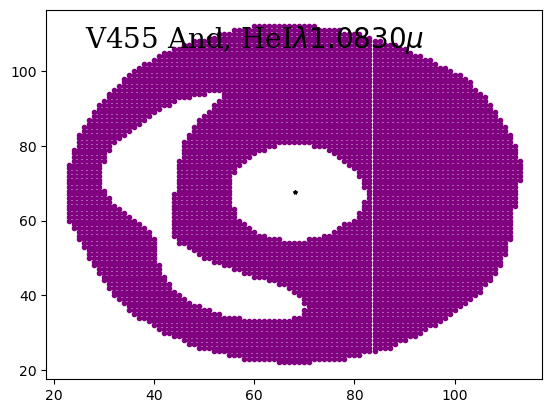

veloc =  72.16659054636011


'\n#cheking chi2 of estimated parameters\npars = [res.x[0]+0.01e-15, res.x[1]+0.01, res.x[2]+0.01]\nprint(chi2(pars))\npars = [res.x[0], res.x[1], res.x[2]]\nprint(chi2(pars))\n'

In [36]:
x_m = np.mean(xx)
y_m = np.mean(yy)

def calc_R(x_c, y_c): 
    """Рассчитать расстояние между точкой данных s и центром (x_c, y_c)"""
    return np.sqrt((Xal-x_c)**2 + (Yal-y_c)**2)

def f_2(c, In):
    """Рассчитать остаточный радиус"""
    Ri = calc_R(*c)
    return (Ri - np.mean(Ri))*np.sqrt(In)




center_estimate = x_m, y_m
center_2, ier = leastsq(f_2, center_estimate, args=(I))

xc_2, yc_2 = center_2
Ri_2       = calc_R(*center_2)
R_lsq        = Ri_2.mean()
residu_2   = sum((Ri_2 - R_lsq)**2)
print('start R = ', R_lsq)
print('\n')

angles2 = np.linspace(0,2*np.pi,100,True)
x2 = xc_2 + np.cos(angles2) * R_lsq
y2 = yc_2 + np.sin(angles2) * R_lsq
'''
plt.plot(XX, YY, '.', color = 'salmon')
plt.plot(x2, y2 ,"r-", lw=3)
plt.plot(xc_2, yc_2, '.', color='red')
plt.suptitle(title, **csfont, x = 0.5, y=0.85)
plt.show()
'''




def gauss(A, sig, R, xc, yc, x, y):
    return (A*np.exp(-(np.sqrt((x - xc)**2 + (y - yc)**2) - R)**2/(2*(sig**2))))

def chi2(pars):
    s = 0
    for i in range(0, len(r)):
        s = s + (I[i] - gauss(pars[0], pars[1], pars[2], pars[3], pars[4], Xal[i], Yal[i]))**2
    return s

pars = [np.max(I)/2, 5, R_lsq, xc_2, yc_2] 
r = np.sqrt((Xal-xc_2)**2 + (Yal-yc_2)**2)
res = minimize(chi2, pars, method='Nelder-Mead')
print(res.x[0], res.x[1], res.x[2], res.x[3], res.x[4])



'''  
R = res.x[2]
XX2, YY2, I2 = [], [], [] 
r = np.sqrt((XX - xc_2)**2 + (YY - yc_2)**2)
for i in range(0, len(r)):
    if (r[i] <= (R + res.x[1]) and r[i] >= (R - res.x[1])):
        XX2.append(XX[i])
        YY2.append(YY[i])
        I2.append(In[i])
'''


'''
plot accretion disk on tomogram
'''
'''
center_estimate = x_m, y_m
center_2, ier = leastsq(f_2, center_estimate, args=(I2))

xc_3, yc_3 = center_2
Ri_2       = calc_R(*center_2)
R_2        = res.x[2]
residu_2   = sum((Ri_2 - R_2)**2)
'''
xc_3 = res.x[3]
yc_3 = res.x[4]
R_3 = res.x[2]

x_ent = xc_3 + np.cos(0) * (R_3-res.x[1])
y_ent = yc_3 + np.sin(0) * (R_3-res.x[1])
x_out = xc_3 + np.cos(0) * (R_3+res.x[1])
y_out = yc_3 + np.sin(0) * (R_3+res.x[1])
 
r = np.sqrt((XX - xc_3)**2 + (YY - yc_3)**2)
r_ent = np.sqrt((x_ent - xc_3)**2 + (y_ent - yc_3)**2)
r_out = np.sqrt((x_out - xc_3)**2 + (y_out - yc_3)**2)
x_cir, y_cir = [], []

for i in range(0, len(r)):
    if (r[i] >= r_ent and r[i] <= r_out):
        x_cir.append(XX[i])
        y_cir.append(YY[i])

plt.plot(x_cir, y_cir, '.', color = 'purple')    
plt.plot(xc_3, yc_3, 'k*', markersize=3)
plt.suptitle(title, **csfont, x = 0.45, y=0.85)
plt.show()

# скорости центра масс БК
xe = (xc_3 - nps/2)*2*vmax/nps
ye = (yc_3 - nps/2)*2*vmax/nps
print('veloc = ', np.sqrt(xe**2+ye**2))


'''
ploting O-C diagram
'''
'''
plt.figure(figsize=(8,6))
X, Y, x, y, OC, oc = [], [], [], [], [], []

for i in range (1, len(Yal)):
    if (Yal[i] == Yal[i-1]):
        x.append(Xal[i-1])
        y.append(Yal[i-1])
        oc.append(I[i-1] - gauss(res.x[0], res.x[1], res.x[2], res.x[3], res.x[4], Xal[i-1], Yal[i-1]))
    else:
        x.append(Xal[i-1])
        y.append(Yal[i-1])
        oc.append(I[i-1] - gauss(res.x[0], res.x[1], res.x[2], res.x[3], res.x[4], Xal[i-1], Yal[i-1]))
        OC.append(oc)
        X.append(x)
        Y.append(y)
        oc = []
        x = []
        y = [] 
oc.append(I[i-1] - gauss(res.x[0], res.x[1], res.x[2], res.x[3], res.x[4], Xal[i-1], Yal[i-1]))
x.append(Xal[i])
y.append(Yal[i])
OC.append(oc)
X.append(x)
Y.append(y)


plt.pcolor(X, Y, OC, cmap='RdGy_r')
cbar = plt.colorbar(label="O-C", orientation="vertical")
#plt.clim(-3.5e-16, 3.5e-16) 
#cbar.set_ticks([-3.5e-16, 0, 3.5e-16]) 
#cbar.set_ticklabels(['-0.5e-16', '0', '0.5e-16']) #Hgam2013
cmap.set_bad(color='white')
if projection == 0:
    if polar_grid:
        if model_overlap:
            plotmodel(0)
        circcoo(vels0, vmax, nps, 0)
        #xx, yy = circcoo(vels0, vmax, nps, 0)
        plt.hlines(nps/2, -0.05*nps, nps+0.05*nps, linestyles='--', linewidth=0.5)
        plt.vlines(nps/2, -0.05*nps, nps+0.05*nps, linestyles='--', linewidth=0.5)
        plt.xlim([-0.05*nps, nps+0.05*nps])
        plt.ylim([-0.05*nps, nps+0.05*nps])
        plt.text(nps + nps*0.01, nps/2 + 0.02*nps, '0$\degree$', **csfont)
        plt.text(nps/2-nps*0.08, nps+0.02*nps, '90$\degree$', **csfont)
        plt.text(-nps*0.115, nps/2 - 0.045*nps, '180$\degree$', **csfont)
        plt.text(nps/2+nps*0.01, -nps*.045, '270$\degree$', **csfont)
        plt.xlabel('($\\theta$, v)')
        plt.axis('off')
    if caster_grid:
        if model_overlap:
            plotmodel(0)
        xx, yy = circcoo(vels0, vmax, nps, 0)
        plt.hlines(nps/2, -0.05*nps, nps+0.05*nps, linestyles='--', linewidth=0.5)
        plt.vlines(nps/2, -0.05*nps, nps+0.05*nps, linestyles='--', linewidth=0.5)
        plt.axis('on')
        plt.xticks(ticks = ticks, labels=vels)
        plt.yticks(ticks = ticks, labels=vels)
        plt.xlabel('$V_X$, km s$^{-1}$', **csfont)
        plt.ylabel('$V_Y$, km s$^{-1}$', **csfont)
        plt.tick_params(axis="both", direction="in", right='on', top='on')
        plt.xlim([-0.05*nps, nps+0.05*nps])
        plt.ylim([-0.05*nps, nps+0.05*nps])
if projection == 1:
    if model_overlap:
        plotmodel(1)
    circcoo(vels0, vmax, nps, 1)
    xx, yy = circcoo(vels0, vmax, nps, 1)
    plt.hlines(nps/2, -0.05*nps, nps+0.05*nps, linestyles='--', linewidth=0.5)
    plt.vlines(nps/2, -0.05*nps, nps+0.05*nps, linestyles='--', linewidth=0.5)
    plt.xlim([-0.05*nps, nps+0.05*nps])
    plt.ylim([-0.05*nps, nps+0.05*nps])
    plt.text(nps + nps*0.01, nps/2 + 0.02*nps, '0$\degree$', **csfont)
    plt.text(nps/2-nps*0.08, nps+0.02*nps, '90$\degree$', **csfont)
    plt.text(-nps*0.115, nps/2 - 0.045*nps, '180$\degree$', **csfont)
    plt.text(nps/2+nps*0.01, -nps*.045, '270$\degree$', **csfont)
    plt.axis('off')

plt.suptitle(title, **csfont, x = 0.45, y=0.85)
'''

'''
#cheking chi2 of estimated parameters
pars = [res.x[0]+0.01e-15, res.x[1]+0.01, res.x[2]+0.01]
print(chi2(pars))
pars = [res.x[0], res.x[1], res.x[2]]
print(chi2(pars))
'''